In [1]:
import pandas as pd
import numpy as np
temp_df=pd.read_csv('IMDB_Dataset.csv')
df= temp_df.iloc[:10000]
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [2]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [3]:
df.duplicated().sum()

17

In [6]:
df.drop_duplicates(inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8644\3006716147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [7]:
df.duplicated().sum()

0

In [8]:
df['sentiment'].value_counts()

sentiment
positive    5023
negative    4960
Name: count, dtype: int64

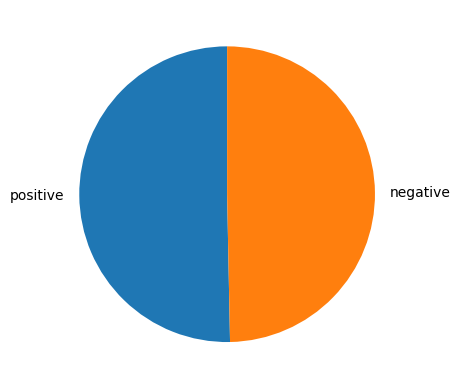

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['sentiment'].value_counts(),labels = df['sentiment'].value_counts().index,startangle=90)
plt.show()

In [22]:
df['transformed_text']=df['review'].apply(len)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8644\3543772236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['review'].apply(len)


In [23]:
df.head()

,review,sentiment,transformed_text
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317


In [32]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.stem import SnowballStemmer

# Download stopwords and stemmer if not already downloaded
# nltk.download('stopwords')
# nltk.download('snowball_data')

def preprocess_text(text):
    # Remove HTML tags
    clean_text = re.sub(r'<.*?>', '', text)
    # Remove URLs
    clean_text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', clean_text)
    # Tokenize into sentences
    sentences = sent_tokenize(clean_text)
    
    # Process each sentence
    processed_sentences = []
    for sentence in sentences:
        # Remove punctuation
        sentence = sentence.translate(str.maketrans('', '', string.punctuation))
        # Convert to lowercase
        sentence = sentence.lower()
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        words = sentence.split()
        filtered_words = [word for word in words if word.lower() not in stop_words]
        
        # Apply Snowball Stemmer to each word
        stemmer = SnowballStemmer('english')
        stemmed_words = [stemmer.stem(word) for word in filtered_words]
        
        processed_sentence = ' '.join(stemmed_words)
        processed_sentences.append(processed_sentence)
    
    # Join the processed sentences back into a single string
    clean_text = ' '.join(processed_sentences)
    
    # Correct text using TextBlob
    # Uncomment the following lines if you want to use TextBlob for text correction
    # txtblb = TextBlob(clean_text)
    # corrected_text = txtblb.correct()
    
    return clean_text

# Apply preprocessing function to 'review' column
df['review'] = df['review'].apply(preprocess_text)



C:\Users\Admin\AppData\Local\Temp\ipykernel_8644\3356192186.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(preprocess_text)


In [33]:
df['review'][1]

'wonder littl product film techniqu unassum oldtimebbc fashion give comfort sometim discomfort sens realism entir piec actor extrem well chosen michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrif written perform piec master product one great master comedi life realism realli come home littl thing fantasi guard rather use tradit dream techniqu remain solid disappear play knowledg sens particular scene concern orton halliwel set particular flat halliwel mural decor everi surfac terribl well done'

In [34]:
df['sent_tokenized'] = df['review'].apply(lambda x: len(sent_tokenize(x)))

C:\Users\Admin\AppData\Local\Temp\ipykernel_8644\2268748308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sent_tokenized'] = df['review'].apply(lambda x: len(sent_tokenize(x)))


In [35]:
df.head()

,review,sentiment,transformed_text,sent_tokenized
0,one review mention watch 1 oz episod youll hoo...,positive,1761,1
1,wonder littl product film techniqu unassum old...,positive,998,1
2,thought wonder way spend time hot summer weeke...,positive,926,1
3,basic there famili littl boy jake think there ...,negative,748,1
4,petter mattei love time money visual stun film...,positive,1317,1


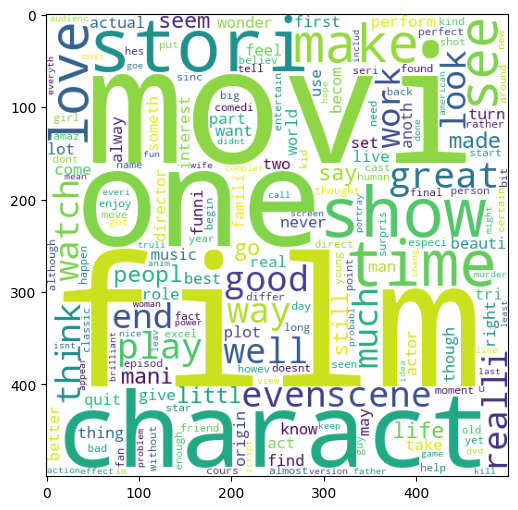

In [62]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
positive_wc = wc.generate(df[df['sentiment'] == 'positive']['review'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(positive_wc)

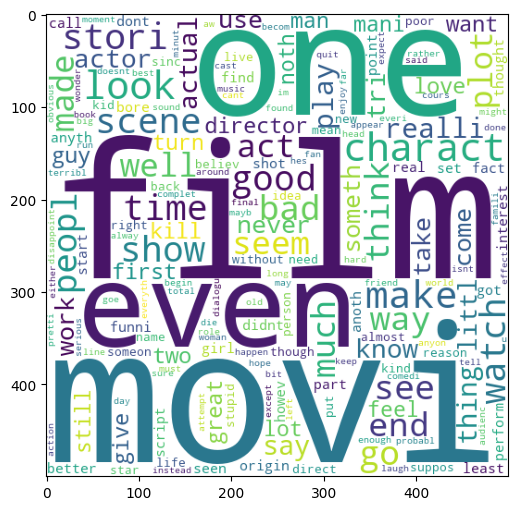

In [63]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
neg_wc = wc.generate(df[df['sentiment'] == 'negative']['review'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(neg_wc)

# vectorization

In [53]:
x = df['review']
y=df['sentiment']
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y=encoder.fit_transform(y)

In [64]:
# bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv =CountVectorizer(max_features=3000,ngram_range=(1,1))
x=cv.fit_transform(x).toarray()


In [66]:
#split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.2,random_state = 42)

In [67]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [69]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7541311967951928
[[822 163]
 [328 684]]
0.807556080283353


In [70]:
mnb.fit(x_train,y_train)
y_pred2 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.7541311967951928
[[822 163]
 [328 684]]
0.807556080283353


In [72]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.85728592889334
[[834 151]
 [134 878]]
0.8532555879494655


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [76]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [77]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [81]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [83]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.543314972458688, 0.549800796812749)

In [85]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.543314972458688
Precision -  0.549800796812749
For  KN
Accuracy -  0.6399599399098648
Precision -  0.615993665874901
For  NB
Accuracy -  0.8582874311467201
Precision -  0.8648648648648649
For  DT
Accuracy -  0.699549323985979
Precision -  0.6486291486291487
For  LR
Accuracy -  0.8597896845267902
Precision -  0.8567251461988304
For  RF
Accuracy -  0.829744616925388
Precision -  0.8407707910750507
For  AdaBoost
Accuracy -  0.8067100650976464
Precision -  0.7947269303201506
For  BgC
Accuracy -  0.7886830245368052
Precision -  0.7842003853564548
For  ETC
Accuracy -  0.8462694041061593
Precision -  0.86302780638517
For  GBDT
Accuracy -  0.7981972959439159
Precision -  0.7650130548302873
For  xgb
Accuracy -  0.8352528793189785
Precision -  0.8188608776844071


In [86]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [87]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.858287,0.864865
8,ETC,0.846269,0.863028
4,LR,0.859790,0.856725
5,RF,0.829745,0.840771
10,xgb,0.835253,0.818861
6,AdaBoost,0.806710,0.794727
7,BgC,0.788683,0.784200
9,GBDT,0.798197,0.765013
3,DT,0.699549,0.648629
1,KN,0.639960,0.615994


In [89]:
# Voting Classifier
lrc = LogisticRegression(solver='liblinear', penalty='l1')
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('LR', lrc,), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('LR',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear')),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [91]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.871306960440661
Precision 0.8726554787759131


In [92]:
import pickle
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(voting,open('model.pkl','wb'))